## Load Datasets
Fashion-MNIST datasets

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from  keras .datasets import fashion_mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [ ]:
n = 5

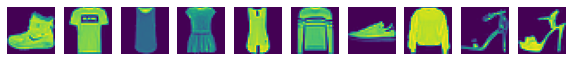

label for each of the above image: [9 0 0 3 0 2 7 2 5 5] 


In [ ]:
# visualizing the first 10 images in the dataset and their labeles
plt.figure(figsize = (10, 1))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
plt.show()
print('label for each of the above image: %s '%(y_train[0:10]))

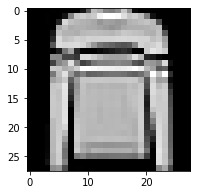

Label :  2


In [ ]:
plt.figure(figsize = [3,3])
plt.imshow(x_train[n], cmap = 'gray')      #show first number in dataset
plt.show()
print('Label : ',y_train[n])

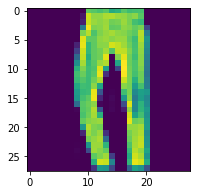

Label : 1


In [ ]:
plt.figure(figsize = [3,3])
plt.imshow(x_test[n])
plt.show()
print('Label :',y_test[n])

## Data Pre-processing

In [ ]:
#Reshaping x data:(n,28,28) => (n,784)
x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))

In [ ]:
# Converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


##Basic NN model
Naive MLP model without any alterations

In [ ]:
from keras.layers import Activation,Dense
from keras import optimizers

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
60000/60000 [==============================] - 1s 24us/step - loss: 2.3175 - accuracy: 0.1158
Epoch 2/100
60000/60000 [==============================] - 1s 20us/step - loss: 2.2988 - accuracy: 0.1459
Epoch 3/100
60000/60000 [==============================] - 1s 20us/step - loss: 2.2967 - accuracy: 0.1690
Epoch 4/100
60000/60000 [==============================] - 1s 20us/step - loss: 2.2946 - accuracy: 0.1785
Epoch 5/100
60000/60000 [==============================] - 1s 19us/step - loss: 2.2923 - accuracy: 0.2074
Epoch 6/100
60000/60000 [==============================] - 1s 19us/step - loss: 2.2899 - accuracy: 0.2314
Epoch 7/100
60000/60000 [==============================] - 1s 19us/step - loss: 2.2871 - accuracy: 0.2540
Epoch 8/100
60000/60000 [==============================] - 1s 19us/step - loss: 2.2838 - accuracy: 0.2621
Epoch 9/100
60000/60000 [==============================] - 1s 19us/step - loss: 2.2801 - accuracy: 0.2770
Epoch 10/100
60000/60000 [====================

In [ ]:
results = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 35us/step


In [ ]:
print('Test accuracy : ',results[1])

Test accuracy :  0.7343000173568726


##Weight Initialization
Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree.

In [ ]:
def mlp_model():
  model = Sequential()

  model.add(Dense(50, input_shape = (784, ), kernel_initializer = 'he_normal'))
  model.add(Activation('sigmoid'))
  model.add(Dense(50, kernel_initializer = 'he_normal'))
  model.add(Activation('sigmoid'))
  model.add(Dense(50, kernel_initializer = 'he_normal'))
  model.add(Activation('sigmoid'))
  model.add(Dense(50, kernel_initializer = 'he_normal'))
  model.add(Activation('sigmoid'))
  model.add(Dense(10, kernel_initializer = 'he_normal'))
  model.add(Activation('softmax'))

  sgd = optimizers.SGD(lr = 0.01)
  model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [ ]:
model = mlp_model()
history = model.fit(x_train, y_train, batch_size = 200, epochs = 10, verbose = 1)

In [ ]:
results = model.evaluate(x_test, y_test)

In [ ]:
print('Test accuracy : ',results[1])

##Non-linearity (Activation function)

In [ ]:
def mlp_model():
  model = Sequential()

  model.add(Dense(50, input_shape = (784, )))
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(Activation('relu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  sgd = optimizers.SGD(lr = 0.01)
  model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [ ]:
model = mlp_model()
history = model.fit(x_train, y_train, batch_size = 200, epochs = 10, verbose = 1)

In [ ]:
results = model.evaluate(x_test, y_test)

In [ ]:
print('Test accuracy : ',results[1])

##Batch Normalization
Batch normalization is one of the methods to prevent the 'internal covarience shift' problem ,has proven to be highly effective.
Batch normalization layer is usually inserted after dense/convolution and before nonlinearity.

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
def mlp_model():
  model.Sequential()

  model.add(Dense(50, input_shape = (784, )))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(BachNormalization())
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(BachNormalization())
  model.add(Activation('relu'))
  model.add(Dense(50))
  model.add(BachNormalization())
  model.add(Activation('relu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  sgd = optimizers.SGD(lr = 0.01)
  model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
model = mlp_model()
history = model.fit(x_train, y_train, batch_size = 200, epochs = 10, verbose = 1)

In [ ]:
results = model.evaluate(x_test, y_test)

In [ ]:
print('Test accuracy : ',results[1])

##Dropout

In [ ]:
def mlp_model():
  model = Sequential()

  model.add(Dense(50, input_shape = (784, ), kernel_initializer = 'he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(50, kernel_initializer = 'hi_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(50, kernel_initializer = 'hi_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(50, kernel_initializer = 'hi_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, kernel_initializer = 'hi_normal'))
  model.add(Activation('softmax'))

  adam = optimizers.Adam(lr = 0.01)
  model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [ ]:
model = mlp_model()
history = model.fit(x_train, y_train, epochs = 10, verbose = 1)

In [ ]:
results = model.evaluate(x_test, y_test)

In [ ]:
print('Test accuracy : ',results[1])